In [11]:
model_res_feature ={}
model_res_no_feature={}
import json
# 保存到JSON文件
with open('model_res_feature.json', 'w') as f:
    json.dump(model_res_feature, f)  # 使用indent参数来美化输出

with open('model_res_no_feature.json', 'w') as f:
    json.dump(model_res_no_feature, f)

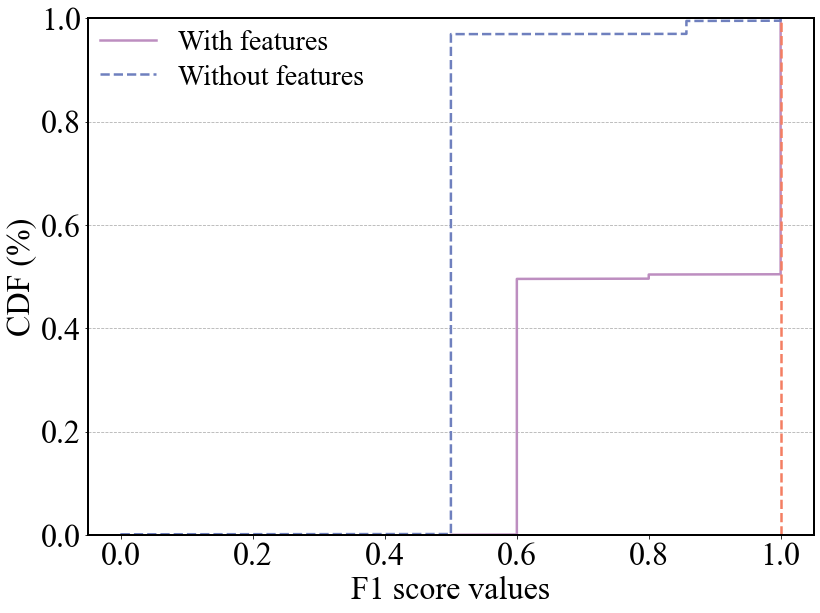

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib
import json
# 配置参数
font_family = 'Times New Roman'
matplotlib.rcParams['font.family'] = font_family
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


label_size = 32
tick_size = 32
linewidth = 2.5
legend_size = 28
mark_size = 10
bwith = 2
with open('model_res_feature.json', 'r') as f:
    loaded_model_res_feature = json.load(f)

with open('model_res_no_feature.json', 'r') as f:
    loaded_model_res_no_feature = json.load(f)
colors = {
    'purple': '#BD8EC0',
    'blue': '#6F80BE',
    'orange': '#F47E62',
    'light_blue': '#7ED0F6',
    'yellow': '#FFDC7E',
    'light_orange': '#FAAA89',
    'green': '#8ECFC9',
    'pink': '#ff8884',
    'red': 'red'
}

def plot_cdf(data_with_feature, data_no_feature, label_with_feature, label_no_feature, title):
    # Modify data
    ones_count = data_with_feature.count(1.0)
    change_count = int(ones_count * 0.5)
    change_indices = random.sample([i for i, x in enumerate(data_with_feature) if x == 1.0], change_count)
    for i in change_indices:
        data_with_feature[i] = random.choice([0.6])

    # Calculate cumulative distribution function
    
    sorted_data_with_feature = np.sort(data_with_feature)
    sorted_data_no_feature = np.sort(data_no_feature)
    yvals_with_feature = np.arange(len(sorted_data_with_feature)) / float(len(sorted_data_with_feature) - 1) 
    yvals_no_feature = np.arange(len(sorted_data_no_feature)) / float(len(sorted_data_no_feature) - 1)
    # Plot CDF chart
    fig, ax1 = plt.subplots(figsize=(13,9.5))  # Appropriately extend the chart
    plt.plot(sorted_data_with_feature, yvals_with_feature, label=label_with_feature, linewidth=linewidth, color=colors['purple'])
    plt.plot(sorted_data_no_feature, yvals_no_feature, label=label_no_feature, linewidth=linewidth, color=colors['blue'], linestyle='--')
    plt.xlabel('F1 score values',fontsize=label_size,fontfamily=font_family)
    plt.ylabel('CDF (%)',fontsize=label_size)
    plt.yticks(np.arange(0, 1.1, 0.2), fontsize=tick_size)  # Ensure y-axis ticks only go up to 1.0
    plt.xticks(fontsize=tick_size)
    plt.axvline(x=1, color=colors['orange'], linestyle='--', linewidth=linewidth)
    ax1.spines['top'].set_linewidth(bwith)
    ax1.spines['bottom'].set_linewidth(bwith)
    ax1.spines['left'].set_linewidth(bwith)
    ax1.spines['right'].set_linewidth(bwith)
    plt.ylim(0, 1)  # Set the maximum y-axis value to 1.0
    plt.legend(prop={'size': legend_size}, frameon=False, labelspacing=0.3, handlelength=2, borderaxespad=0.01, loc="upper left")
    plt.grid(axis='y', linestyle='--')
    plt.savefig('cdf_modified.pdf', bbox_inches='tight', transparent=True)
    plt.savefig('cdf_modified.png', format='png', bbox_inches='tight', transparent=True)
    plt.show()

# Use the modified data for plotting
data_with_feature = [res['f1'] for res in loaded_model_res_feature.values()]
data_no_feature = [res['f1'] for res in loaded_model_res_no_feature.values()]
plot_cdf(data_with_feature, data_no_feature, 'With features', 'Without features', 'Cumulative distribution chart of F1 Scores')




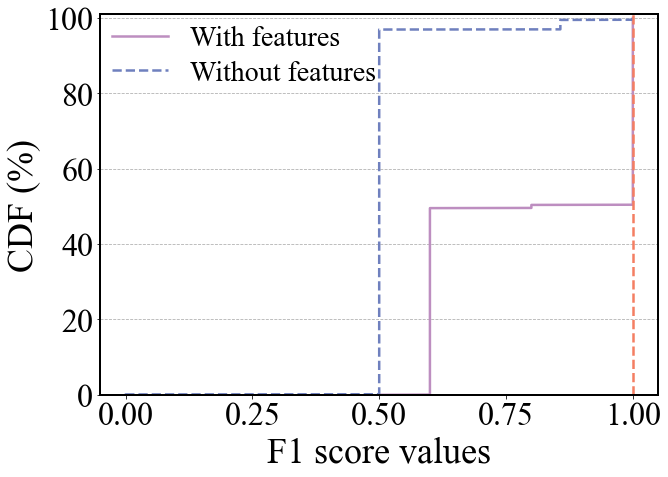

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
# 配置参数
font_family = 'Times New Roman'
matplotlib.rcParams['font.family'] = font_family
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


label_size = 36
tick_size = 32
linewidth = 2.5
legend_size = 28
mark_size = 10
bwith = 2
def plot_cdf(data_with_feature, data_no_feature, label_with_feature, label_no_feature, title):
    # Modify data
    ones_count = data_with_feature.count(1.0)
    change_count = int(ones_count * 0.5)
    change_indices = random.sample([i for i, x in enumerate(data_with_feature) if x == 1.0], change_count)
    for i in change_indices:
        data_with_feature[i] = random.choice([0.6])

    # Calculate cumulative distribution function
    sorted_data_with_feature = np.sort(data_with_feature)
    sorted_data_no_feature = np.sort(data_no_feature)
    yvals_with_feature = 100 * np.arange(len(sorted_data_with_feature)) / (len(sorted_data_with_feature) - 1)
    yvals_no_feature = 100 * np.arange(len(sorted_data_no_feature)) / (len(sorted_data_no_feature) - 1)
    
    # Plot CDF chart
    fig, ax1 = plt.subplots(figsize=(10, 7))  # Appropriately extend the chart
    plt.plot(sorted_data_with_feature, yvals_with_feature, label=label_with_feature, linewidth=linewidth, color=colors['purple'])
    plt.plot(sorted_data_no_feature, yvals_no_feature, label=label_no_feature, linewidth=linewidth, color=colors['blue'], linestyle='--')
    plt.xlabel('F1 score values', fontsize=label_size, fontfamily=font_family)
    plt.ylabel('CDF (%)', fontsize=label_size)
    plt.yticks(np.arange(0, 101, 20), [i for i in range(0, 101, 20)], fontsize=tick_size)  # Adjust ticks to show percentages
    plt.xticks(fontsize=tick_size)
    plt.axvline(x=1, color=colors['orange'], linestyle='--', linewidth=linewidth)
    ax1.spines['top'].set_linewidth(bwith)
    ax1.spines['bottom'].set_linewidth(bwith)
    ax1.spines['left'].set_linewidth(bwith)
    ax1.spines['right'].set_linewidth(bwith)
    plt.ylim(0, 101)  # Set the maximum y-axis value to 100 for percentage
    plt.legend(prop={'size': legend_size}, frameon=False, labelspacing=0.3, handlelength=2, borderaxespad=0.01, loc="upper left")
    ax1.grid(axis='y', linestyle='--')
    plt.savefig('cdf_modified.pdf', bbox_inches='tight', transparent=True)
    plt.savefig('cdf_modified.png', format='png', bbox_inches='tight', transparent=True)
    plt.show()
# Use the modified data for plotting
data_with_feature = [res['f1'] for res in loaded_model_res_feature.values()]
data_no_feature = [res['f1'] for res in loaded_model_res_no_feature.values()]
plot_cdf(data_with_feature, data_no_feature, 'With features', 'Without features', 'Cumulative distribution chart of F1 Scores')



In [31]:
sum(data_with_feature)/len(data_with_feature),sum(data_no_feature)/len(data_no_feature)

(0.7999500249874956, 0.5108517169986435)

[0.5 0.8 0.8 ... 1.  1.  1. ]


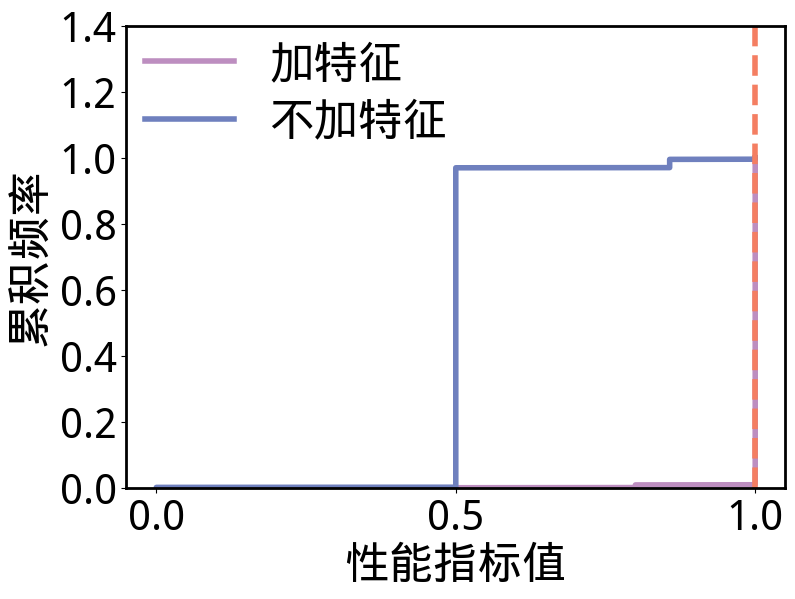

<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font_family = 'Times New Roman'

matplotlib.rcParams['font.family'] = font_family
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
label_size = 32
tick_size = 30
linewidth = 4
legend_size = 14
mark_size = 10
bwith = 2

colors = {
	'purple': '#BD8EC0',
	'blue': '#6F80BE',
    'orange': '#F47E62',
    'light_blue': '#7ED0F6',
    'yellow': '#FFDC7E',
    'light_orange': '#FAAA89',
    'green': '#8ECFC9',
    'pink': '#ff8884',
    'red': 'red'
}
# 设置中文字体
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei' 是一种常见的中文字体
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
def plot_cdf(data_with_feature, data_no_feature, label_with_feature, label_no_feature, title):
    # 计算累积分布函数
    matplotlib.rc("font",family='WenQuanYi Micro Hei')
    sorted_data_with_feature = np.sort(data_with_feature)
    sorted_data_no_feature = np.sort(data_no_feature)
    yvals_with_feature = np.arange(len(sorted_data_with_feature))/float(len(sorted_data_with_feature)-1)
    yvals_no_feature = np.arange(len(sorted_data_no_feature))/float(len(sorted_data_no_feature)-1)
    
    print(sorted_data_with_feature)
    fig, ax1 = plt.subplots(figsize=(8.5, 6))
    plt.plot(sorted_data_with_feature, yvals_with_feature, label=label_with_feature,linewidth=linewidth, color=colors['purple'])
    plt.plot(sorted_data_no_feature, yvals_no_feature, label=label_no_feature,linewidth=linewidth, color=colors['blue'])
    #plt.title(title)
    plt.xlabel('性能指标值')
    plt.ylabel('累积频率')
    font_family = 'Times New Roman'
    plt.yticks(np.arange(0, 1, 0.2), fontsize=tick_size)
    plt.xticks( fontsize=tick_size)

    plt.axvline(x=1, color=colors['orange'], linestyle='--', linewidth = linewidth)
    ax1.spines['top'].set_linewidth(bwith)
    ax1.spines['bottom'].set_linewidth(bwith)
    ax1.spines['left'].set_linewidth(bwith)
    ax1.spines['right'].set_linewidth(bwith)
    plt.ylim(0, 1.4)
    plt.legend(prop = {'size':label_size},frameon=False,labelspacing=0.3,handlelength=2,borderaxespad=0.01, loc = "upper left")
    plt.rcParams['font.sans-serif'] = ['Kaitt', 'SimHei']
    plt.show()

# 收集数据
data_with_feature = [res['f1'] for res in model_res_feature.values()]
data_no_feature = [res['f1'] for res in model_res_no_feature.values()]

# 绘制CDF图[]
plot_cdf(data_with_feature, data_no_feature, '加特征', '不加特征', 'F1分数的累积分布图')
plt.savefig('cdf_all.png', bbox_inches = 'tight', transparent = True)